### データの整理・クレンジング


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

font = {"family": "Yu Mincho"}
plt.rc("font", **font)
df = pd.read_csv("data/stock_price.csv")
print(df.info())
display(df.head())

<class 'pandas.DataFrame'>
RangeIndex: 9547 entries, 0 to 9546
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日付      9547 non-null   str    
 1   終値      9547 non-null   float64
 2   始値      9547 non-null   float64
 3   高値      9547 non-null   float64
 4   安値      9547 non-null   float64
 5   出来高     9547 non-null   str    
 6   変化率 %   9547 non-null   str    
dtypes: float64(4), str(3)
memory usage: 522.2 KB
None


,日付,終値,始値,高値,安値,出来高,変化率 %
0,2025-12-30,157.7,158.9,158.9,157.7,131.30M,-0.57%
1,2025-12-29,158.6,159.0,159.1,157.5,143.79M,-0.13%
2,2025-12-26,158.8,157.4,158.9,157.2,152.24M,1.34%
3,2025-12-25,156.7,156.5,157.0,156.2,78.06M,0.26%
4,2025-12-24,156.3,156.0,156.3,155.3,101.92M,0.00%


In [2]:
df["日付"] = pd.to_datetime(df["日付"])
print(df.info())
display(df.head())

<class 'pandas.DataFrame'>
RangeIndex: 9547 entries, 0 to 9546
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日付      9547 non-null   datetime64[us]
 1   終値      9547 non-null   float64       
 2   始値      9547 non-null   float64       
 3   高値      9547 non-null   float64       
 4   安値      9547 non-null   float64       
 5   出来高     9547 non-null   str           
 6   変化率 %   9547 non-null   str           
dtypes: datetime64[us](1), float64(4), str(2)
memory usage: 522.2 KB
None


,日付,終値,始値,高値,安値,出来高,変化率 %
0,2025-12-30,157.7,158.9,158.9,157.7,131.30M,-0.57%
1,2025-12-29,158.6,159.0,159.1,157.5,143.79M,-0.13%
2,2025-12-26,158.8,157.4,158.9,157.2,152.24M,1.34%
3,2025-12-25,156.7,156.5,157.0,156.2,78.06M,0.26%
4,2025-12-24,156.3,156.0,156.3,155.3,101.92M,0.00%


In [3]:
df["出来高"] = df["出来高"].map(
    lambda x: float(x[:-1]) * 1e6 if x[-1] == "M" else float(x[:-1]) * 1e9,
    na_action="ignore",
)
print(df.info())
display(df.head())

<class 'pandas.DataFrame'>
RangeIndex: 9547 entries, 0 to 9546
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日付      9547 non-null   datetime64[us]
 1   終値      9547 non-null   float64       
 2   始値      9547 non-null   float64       
 3   高値      9547 non-null   float64       
 4   安値      9547 non-null   float64       
 5   出来高     9547 non-null   float64       
 6   変化率 %   9547 non-null   str           
dtypes: datetime64[us](1), float64(5), str(1)
memory usage: 522.2 KB
None


,日付,終値,始値,高値,安値,出来高,変化率 %
0,2025-12-30,157.7,158.9,158.9,157.7,131300000.0,-0.57%
1,2025-12-29,158.6,159.0,159.1,157.5,143790000.0,-0.13%
2,2025-12-26,158.8,157.4,158.9,157.2,152240000.0,1.34%
3,2025-12-25,156.7,156.5,157.0,156.2,78060000.0,0.26%
4,2025-12-24,156.3,156.0,156.3,155.3,101920000.0,0.00%


In [4]:
df["変化率 %"] = df["変化率 %"].str.slice(stop=-1)
df["変化率 %"] = pd.to_numeric(df["変化率 %"], errors="raise")
print(df.info())
display(df.head())

<class 'pandas.DataFrame'>
RangeIndex: 9547 entries, 0 to 9546
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日付      9547 non-null   datetime64[us]
 1   終値      9547 non-null   float64       
 2   始値      9547 non-null   float64       
 3   高値      9547 non-null   float64       
 4   安値      9547 non-null   float64       
 5   出来高     9547 non-null   float64       
 6   変化率 %   9547 non-null   float64       
dtypes: datetime64[us](1), float64(6)
memory usage: 522.2 KB
None


,日付,終値,始値,高値,安値,出来高,変化率 %
0,2025-12-30,157.7,158.9,158.9,157.7,131300000.0,-0.57
1,2025-12-29,158.6,159.0,159.1,157.5,143790000.0,-0.13
2,2025-12-26,158.8,157.4,158.9,157.2,152240000.0,1.34
3,2025-12-25,156.7,156.5,157.0,156.2,78060000.0,0.26
4,2025-12-24,156.3,156.0,156.3,155.3,101920000.0,0.00


In [5]:
df = df.rename(
    columns={
        "日付": "Date",
        "終値": "Close",
        "始値": "Open",
        "高値": "High",
        "安値": "Low",
        "出来高": "Volume",
        "変化率 %": "Change %",
    }
)
df.head()

,Date,Close,Open,High,Low,Volume,Change %
0,2025-12-30,157.7,158.9,158.9,157.7,131300000.0,-0.57
1,2025-12-29,158.6,159.0,159.1,157.5,143790000.0,-0.13
2,2025-12-26,158.8,157.4,158.9,157.2,152240000.0,1.34
3,2025-12-25,156.7,156.5,157.0,156.2,78060000.0,0.26
4,2025-12-24,156.3,156.0,156.3,155.3,101920000.0,0.00


In [6]:
df = df.set_index("Date")
display(df.head())

,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2025-12-30,157.7,158.9,158.9,157.7,131300000.0,-0.57
2025-12-29,158.6,159.0,159.1,157.5,143790000.0,-0.13
2025-12-26,158.8,157.4,158.9,157.2,152240000.0,1.34
2025-12-25,156.7,156.5,157.0,156.2,78060000.0,0.26
2025-12-24,156.3,156.0,156.3,155.3,101920000.0,0.00


### 株価グラフ


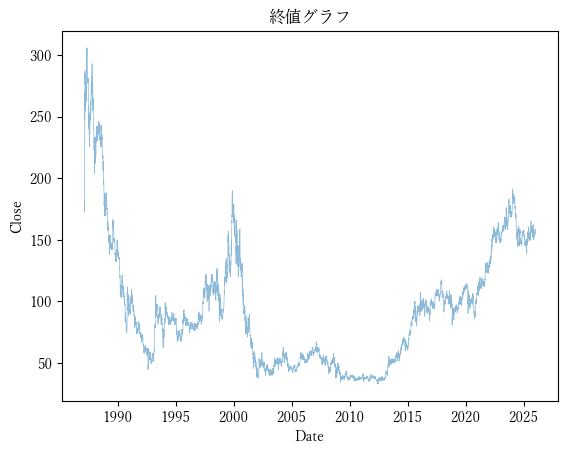

In [7]:
plt.plot(df.index, df["Close"], alpha=0.5, linewidth=0.5)
plt.xlabel(str(df.index.name))
plt.ylabel(str(df["Close"].name))
plt.title("終値グラフ")
plt.show()

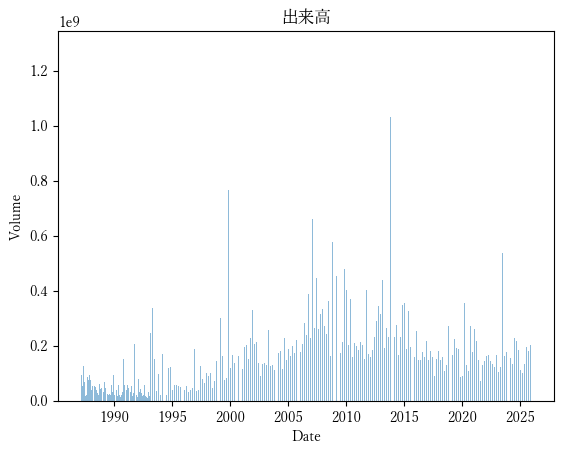

In [8]:
plt.bar(df.index, df["Volume"], alpha=0.5, width=1)
plt.xlabel(str(df.index.name))
plt.ylabel(str(df["Volume"].name))
plt.title("出来高")
plt.show()

In [9]:
start_date = pd.to_datetime('2025-12-01')
end_date = pd.to_datetime('2025-12-30')
df_dec25 = df.loc[end_date:start_date, :]
df_dec25 = df_dec25.iloc[::-1]
display(df_dec25.head())

,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2025-12-01,155.8,156.0,156.2,154.7,146050000.0,0.00
2025-12-02,155.7,156.4,156.8,155.5,143210000.0,-0.06
2025-12-03,154.7,155.8,156.1,154.5,166640000.0,-0.64
2025-12-04,155.6,154.4,156.0,153.9,165080000.0,0.58
2025-12-05,153.9,155.0,155.2,153.9,150710000.0,-1.09


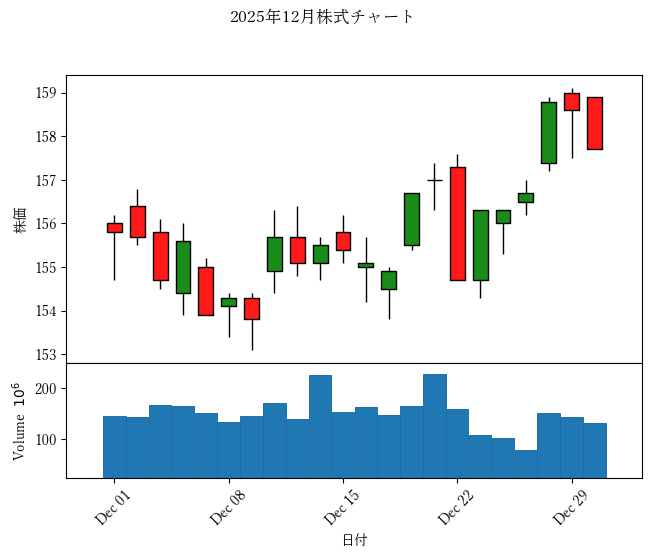

In [22]:
rcpdict = {"font.family": "Yu Mincho"}
mc = mpf.make_marketcolors(up='g', down='r')
s = mpf.make_mpf_style(rc=rcpdict, marketcolors=mc)
mpf.plot(df_dec25, type="candle", title="2025年12月株式チャート", xlabel="日付", ylabel="株価", style=s, volume=True)
mpf.show()

## 移動平均 (2025年)

In [11]:
start_date = pd.to_datetime('2025-01-06')
end_date = pd.to_datetime('2025-12-30')
df_2025 = df.loc[end_date:start_date]
df_2025 = df_2025.iloc[::-1]
display(df_2025.head())

,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2025-01-06,157.0,159.1,159.3,156.1,184900000.0,-0.63
2025-01-07,157.5,157.1,157.8,156.5,135970000.0,0.32
2025-01-08,156.4,157.0,157.2,156.1,132050000.0,-0.70
2025-01-09,155.5,156.2,156.5,155.2,120370000.0,-0.58
2025-01-10,153.7,155.0,155.7,153.6,133810000.0,-1.16


,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2025-01-06,157.000000,159.100000,159.300000,156.100000,1.849000e+08,-0.630000
2025-01-07,157.250000,158.100000,158.550000,156.300000,1.604350e+08,-0.155000
2025-01-08,156.966667,157.733333,158.100000,156.233333,1.509733e+08,-0.336667
2025-01-09,156.600000,157.350000,157.700000,155.975000,1.433225e+08,-0.397500
2025-01-10,156.020000,156.880000,157.300000,155.500000,1.414200e+08,-0.550000
2025-01-14,153.950000,154.550000,155.400000,153.350000,1.452800e+08,-0.415000
2025-01-15,153.900000,154.300000,154.900000,153.200000,1.349250e+08,-0.030000
2025-01-16,153.266667,154.000000,154.533333,152.800000,1.386600e+08,-0.366667
2025-01-17,152.650000,153.350000,153.775000,152.150000,1.440325e+08,-0.472500


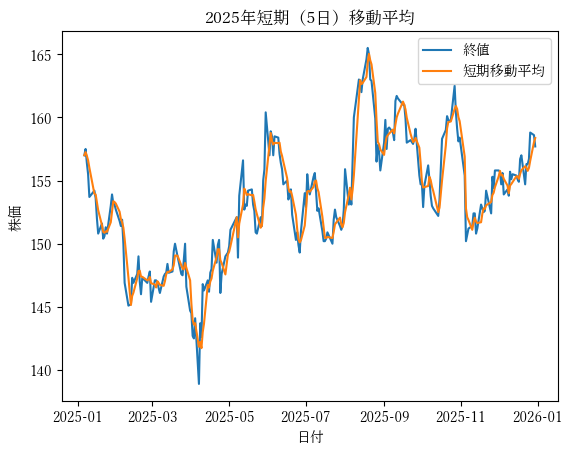

In [17]:
df_2025_rshort = df_2025.rolling('5D').mean()
display(df_2025_rshort.head(10))
plt.plot(df_2025.index, df_2025['Close'], label='終値')
plt.plot(df_2025_rshort.index, df_2025_rshort['Close'], label='短期移動平均')
plt.title('2025年短期（5日）移動平均')
plt.xlabel('日付')
plt.ylabel('株価')
plt.legend()
plt.show()

,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2025-01-06,157.000000,159.100000,159.300000,156.100000,1.849000e+08,-0.630000
2025-01-07,157.250000,158.100000,158.550000,156.300000,1.604350e+08,-0.155000
2025-01-08,156.966667,157.733333,158.100000,156.233333,1.509733e+08,-0.336667
2025-01-09,156.600000,157.350000,157.700000,155.975000,1.433225e+08,-0.397500
2025-01-10,156.020000,156.880000,157.300000,155.500000,1.414200e+08,-0.550000
2025-01-14,155.716667,156.416667,156.933333,155.100000,1.439750e+08,-0.403333
2025-01-15,155.414286,156.142857,156.614286,154.842857,1.395643e+08,-0.401429
2025-01-16,154.987500,155.800000,156.262500,154.487500,1.403850e+08,-0.481250
2025-01-17,154.522222,155.311111,155.733333,154.011111,1.425811e+08,-0.515556


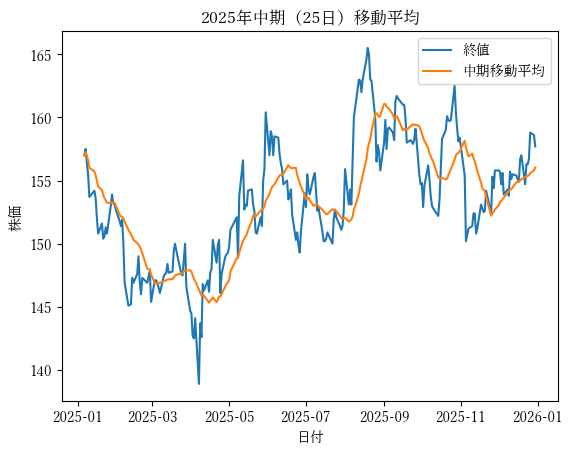

In [19]:
df_2025_rmid = df_2025.rolling("25D").mean()
display(df_2025_rmid.head(10))
plt.plot(df_2025.index, df_2025["Close"], label="終値")
plt.plot(df_2025_rmid.index, df_2025_rmid["Close"], label="中期移動平均")
plt.title("2025年中期（25日）移動平均")
plt.xlabel("日付")
plt.ylabel("株価")
plt.legend()
plt.show()

,Close,Open,High,Low,Volume,Change %
Date,,,,,,
2025-01-06,157.000000,159.100000,159.300000,156.100000,1.849000e+08,-0.630000
2025-01-07,157.250000,158.100000,158.550000,156.300000,1.604350e+08,-0.155000
2025-01-08,156.966667,157.733333,158.100000,156.233333,1.509733e+08,-0.336667
2025-01-09,156.600000,157.350000,157.700000,155.975000,1.433225e+08,-0.397500
2025-01-10,156.020000,156.880000,157.300000,155.500000,1.414200e+08,-0.550000
2025-01-14,155.716667,156.416667,156.933333,155.100000,1.439750e+08,-0.403333
2025-01-15,155.414286,156.142857,156.614286,154.842857,1.395643e+08,-0.401429
2025-01-16,154.987500,155.800000,156.262500,154.487500,1.403850e+08,-0.481250
2025-01-17,154.522222,155.311111,155.733333,154.011111,1.425811e+08,-0.515556


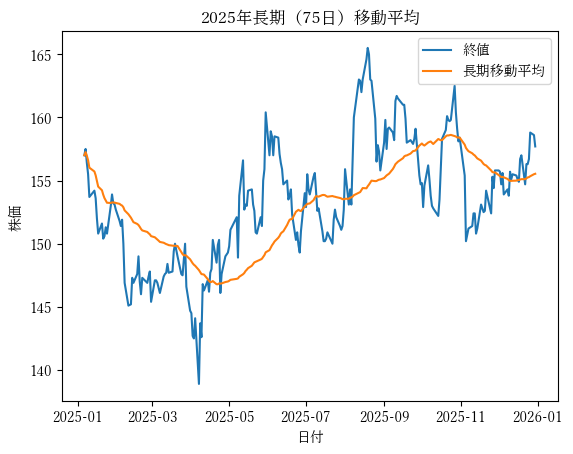

In [20]:
df_2025_rlong = df_2025.rolling("75D").mean()
display(df_2025_rlong.head(10))
plt.plot(df_2025.index, df_2025["Close"], label="終値")
plt.plot(df_2025_rlong.index, df_2025_rlong["Close"], label="長期移動平均")
plt.title("2025年長期（75日）移動平均")
plt.xlabel("日付")
plt.ylabel("株価")
plt.legend()
plt.show()

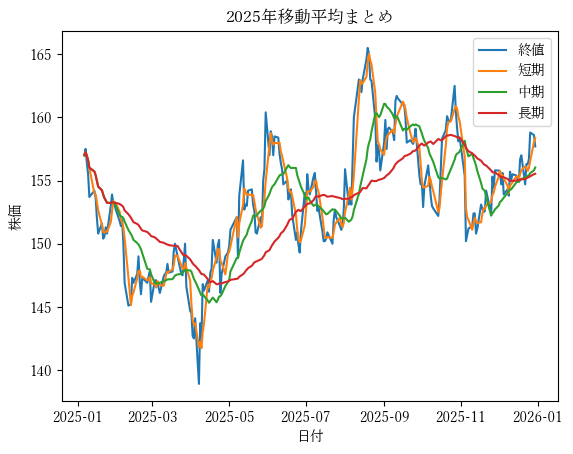

In [21]:
plt.plot(df_2025.index, df_2025["Close"], label="終値")
plt.plot(df_2025_rshort.index, df_2025_rshort['Close'], label='短期')
plt.plot(df_2025_rmid.index, df_2025_rmid['Close'], label='中期')
plt.plot(df_2025_rlong.index, df_2025_rlong["Close"], label="長期")
plt.title("2025年移動平均まとめ")
plt.xlabel("日付")
plt.ylabel("株価")
plt.legend()
plt.show()